<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Supervised ML Modelle: K-Nearest-Neighbour</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

Teile (adaptiert) von *AI Inside Seminar KI Mag. Otto Reichel*!

# k-Nearest Neighbour Klassifizierer

Wir sehen uns nun den $k$-Nearest Neighbor *Klassifizierer* an! Dieser ist ein sehr einfacher und leicht verständlicher Machine Learning Algorithmus, welcher aber dennoch in vielen Fällen eine erstaunlich gute Performance liefert.

Der *kNN*-Klassifizierer $\ldots$
* $\ldots$ wird bei uns verwendet zur *Klassifizierung*
* $\ldots$ wird durch sehr wenige **Hyperparameter** parametrisiert ($k$: Die Anazahl der Nachbarn; $d(x,y)$ Funktion zur Distanzmessung zwischen Datenpunkten $x$ und $y$.)
* $\ldots$ zieht zur Klassifizierung die Labels der nächsten Nachbarn in Betracht 

**Info:** Ein **Hyperparameter** ist ein Parameter, welcher am Anfang vom Benutzer (von uns) eingestellt wird und das Model bzw. ggf. den Lernvorgang parametrisiert.

## Beschreibung des Algorithmus

![KNN-Classifier_for_k=3](../resources/knn_classifier.png)

(von https://mlarchive.com/machine-learning/k-nearest-neighbor-knn-explained/)

Die Beschreibung dieses Models wird nun anhand von einem Beispiel erklärt.

### Ein Beispiel als Erklärung

Wir gehen davon aus, dass ein Datensatz über **Hunde** und **Pferde** vorliegen, von denen jeweils **Größe** und **Gewicht** bekannt ist. An Hand dieser beiden Eingangsfeatures soll klassifiziert werden, ob es sich um einen Hund oder ein Pferd handelt. Trägt man die Features in ein Diagramm ein so könnte sich das folgende Bild ergeben.

![KNN_Hund_vs_Katze](../resources/knn_hund_vs_katze.png)

(von AI Inside Seminar KI Mag. Otto Reichel)

Möchte man nun für einen neuen Datenpunkt $x=(a\textrm{ [lbs]}, b\textrm{ [ft]})$ feststellen, ob es sich um einen Hund oder ein Pferd handelt, kann man die $k$ nächsten Nachbarn betrachten. Gibt es unter diesen Nachbarn mehr Hunde, so wird der neue Datenpunkt als Hund klassifiziert, andernfalls als Pferd.

Dabei wird folgendermaßen vorgegangen:
1) Man berechnet die Distanz von $x$ zu allen anderen gegebenen Datenpunkten
2) Man sortiert die Punkte nach zunehmender Distanz zu $x$
3) Man bestimmt unter den ersten $k$ der sortierten Punkte das am häufigsten auftretende Label. Dies ist nun auch das Label für den neuen Datenpunkt $x$. 

Zusammenfassend kann man also für den **Lernvorgang** und die **Vorhersage** folgendes sagen:

Der Lernprozess (Trainingsphase) für den kNN-Klassifizierer ist sehr einfach und beinhaltet nur indirekt "Lernen".

Die Trainingsdaten $X$ (samt Label $y$) werden im Model effizient gespeichert. Bei der Prediction von einem neuen Datenpunkt können so die nächsten Nachbarn schnell gefunden werden. Dies wird auch *Lazy Learning* genannt.

Wie wird eine Vorhersage (Prediction) gemacht?

* Je nach gewählter Abstandfunktion wird *der Abstand* zu den Datenpunkten *berechnet*.
* Nun werden die Datenpunkte sortiert, sodass die Datenpunkte mit einem geringen Abstand am Anfang gereiht sind.

## Die Wahl von $k$

![kNN_Choice_of_k_matters](../resources/knn_3_vs_7.png)

(von https://ai.plainenglish.io/introduction-to-k-nearest-neighbors-knn-algorithm-e8617a448fa8)

Insgesamt ist die Wahl von $k$ frei wählbar. Es gibt aber trotzdem ein paar Dinge, die es zu beachten gibt!

* Ein gerader Wert von $k$ könnte zu einem Gleichstand führen, in solchen Fällen wird entweder ein zufälliger Wert verwendet, oder nähere Nachbarn werden stärker gewichtet.
* Es kann aber auch bei ungeradem $k$ ein Gleichstand entstehen. Beispiel: Labels 0, 1, 2 für Katze, Hund, Pferd. Nun verwenden wir $k=3$ und erhalten möglicherweise jedes Label einmal.
* *Faustregel:* Beim ersten Durchlauf kann $k\approx\sqrt{\vert X_{\text{train}}\vert}$ verwendet werden, wobei $\vert X_{\text{train}}\vert$ die Anzahl der Datenpunkte im Trainingsset ist.
* Falls *viele Ausreißer* und möglicherweise *Fehler* in den Daten vorhanden sind, ist ein *größerer Wert* für $k$ vorteilhaft, da dies dann diese Punkte etwas ausgleicht, indem mehr "normale" Punkte in Betracht gezogen werden.

![kNN_Choice_k_underfitting_overfitting](../resources/knn_overfitting_underfitting.png)

(von https://medium.com/@jwbtmf/classifying-customer-churn-using-k-nearest-neighbour-supervised-machine-learning-algorithm-3254441ec7be)

Welcher dieser Fälle beschreibt **overfitting** und welcher dieser Fälle beschreibt **underfitting**?

## Die Wahl der Distanz Funktion

Neben dem Wert $k$ als Anzahl der Nachbarn kann man auch entscheiden, welche Funktion als Distanzfunktion verwendet werden soll.

Für numerische Features wird standardmäßig die **euklidische Distanz** $d(x,y)$ verwendet. Sie berechnet sich genauso wie der Betrag von einem Vektor. Für Daten mit $n$ Features, haben wir also
\begin{equation*}
    d(x,y) = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2 + \ldots + (x_n-y_n)^2}.
\end{equation*}
Hier ist $y$ der neue Datenpunkt und $x$ steht für einen Datenpunkt in den (Trainings)daten!

Je nach Anwendungsfall kann aber auch eine andere Distanzfunktion verwendet werden. So gibt es auch zum Beispiel noch die **Manhattan**-Distanz.

Die Manhattan Distanz ist folgendermaßen definiert
\begin{equation*}
    d(x,y) = \vert x_1-y_1 \vert + \vert x_2 - y_2 \vert + \ldots + \vert x_n - y_n \vert.
\end{equation*}

Befinden sich in den Daten **kateogrische** (categorical) Features oder **ordinale** **Features**, so muss eine andere Distanzfunktion (zum Beispiel *Hamming* (Referat?)) verwendet werden, *oder* es werden die Daten zuvor mit einem Ordinalencoder oder einem OneHot-Encoder encodiert.

### Normalisieren der Daten

Da beim Berechnen der Distanz die Größenordnung einen riesen Einfluss hat, müssen wir vor der Verwendung eines kNN-Klassifizierers sicherstellen, dass die Daten einen vernünftigen Bereich haben (alle in etwa den selben Bereich).

Warum ist das so?

Wir können die Daten alle auf einen gleichen Bereich bringen, indem wir eine $z$-score Normalisierung machen.

Zur Wiederholung, die $z$-score Normalisierung eines Features $X$ sieht folgendermaßen aus
\begin{equation*}
    z_i = \frac{x_i-\mu}{\sigma},
\end{equation*}
wobei $\mu$ und $\sigma$ der Mittelwert bzw. die Standardabweichung des Features $X$ sind. $z_i$ ist der standardisierte Wert vom ursprünglichen Wert $x_i$ und $i$ steht für den Index des Datenpunktes.

Wäre eine Min-Max Normalisierung auch möglich?

## Vorteile und Nachteile von kNN

**Vorteile**:
* Sehr einfach
* Extrem gut nachvollziehbar
* Funktioniert in vielen Fällen sehr gut
* Nur wenige Parameter ($k$ und Distanzfunktion)

**Nachteile**:
* Performance nimmt mit der Anzahl der Features ab (In hohen Dimensionen sind alle Punkte etwa gleich weit voneinander entfernt. Dieses Phänomen nennt man **Curse of Dimensionality**)
* Stark abhängig von gewählter Distanzfunktion und gewähltem $k$
* Ohne Normalisieren ($z$-Score Normalisierung) würden die einzelnen Features falsch (sprich stark unterschiedlich) gewichtet werden
* Wird bei großen Datasets sehr rechenintensiv und somit langsam

**Info:** Als Beispiel für den **Curse of Dimensionality** kann man sich folgendes vorstellen: 

Annahme du vergleichst die Attribute: Wohnadresse, Name des Vaters, Name der Mutter und Telefonnummer mit deinem Bruder/deiner Schwester. In diesem Fall seit du und dein/deine Bruder/Schwester sehr ähnlich. Bis auf Telefonnummer sind alle Attribute gleich und im Vergleich zu anderen Personen (zum Beispiel in der Klasse) seit ihr beide euch am nächsten. Nun erweitern wir die gegebenen Features pro Person mit den Features: "Lieblingsfarbe, Alter, Schuhgröße, Ausbildung, Name, Einkommen, $\ldots$ etc.". Mit diesen Features sind plötzlich du und deine Schwester/dein Bruder nicht mehr wirklich ähnlich. Genauer gesagt gibt es jetzt genügend weitere Personen die gleich viele Attribute gleich/ähnlich haben.

## Tipps und Tricks

* Wir können bei nicht allzu großen Datasets auch mehrere $k$-Werte nacheinander probieren und dann den besten Wert verwenden
* Features müssen normalisiert werden ($z$-score normalisiert (=standardisiert))
* Dimension verringern bei schlechter Performance (eventuell mit Korrelationsmatrix bzw. offensichtlich unbrauchbare Features zur Klassifikation)
* Falls ein Label viel öfter vorkommt als ein anderes (unbalanciert), dann könnte man diese Nachbarn höher gewichten (kann in Python/Scikit-Learn einfach gemacht werden, indem ein zusätzlicher Wert übergeben wird.)
* Die $k$ nächsten Nachbarn können auch verwendet werden, um die fehlenden Werte zu ersetzen. Sprich wenn zum Beispiel das Feature "Alter" fehlt, dann können wir die $k$ nächsten Datenpunkte ansehen und schauen, wie das Alter bei diesen Punkte ist. Anschließend können wir zum Beispiel den Durschnitt bilden.

## kNN in Python

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset (Vehicle Silhouettes dataset)
ds = pd.read_csv("../../_data/stroke.csv") # ggf. etwas anders als unser bisheriges Dataset
print(ds)
ds = ds.dropna()
y = ds.stroke
X = ds.drop('stroke', axis=1)
X = X.select_dtypes(include=[np.number])

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [107]:
X

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0,1,228.69,36.6
2,31112,80.0,0,1,105.92,32.5
3,60182,49.0,0,0,171.23,34.4
4,1665,79.0,1,0,174.12,24.0
5,56669,81.0,0,0,186.21,29.0
...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6
5106,44873,81.0,0,0,125.20,40.0
5107,19723,35.0,0,0,82.99,30.6
5108,37544,51.0,0,0,166.29,25.6


In [108]:
X.shape

(4909, 6)

In [109]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [110]:
le = LabelEncoder()
y = le.fit_transform(y)

In [111]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [112]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [113]:
X_scaled

array([[-1.33465284,  1.07013796, -0.31806673,  4.38196829,  2.77769839,
         0.98134488],
       [-0.28353855,  1.64656262, -0.31806673,  4.38196829,  0.0138418 ,
         0.45926914],
       [ 1.10121139,  0.27201152, -0.31806673, -0.22820795,  1.48413156,
         0.70120668],
       ...,
       [-0.82605376, -0.34875349, -0.31806673, -0.22820795, -0.50236926,
         0.21733161],
       [ 0.02284987,  0.36069224, -0.31806673, -0.22820795,  1.37291993,
        -0.41934612],
       [ 0.36272572,  0.05030973, -0.31806673, -0.22820795, -0.45081569,
        -0.34294479]])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [115]:
k_values = range(1, 31)
accuracies = []

In [116]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

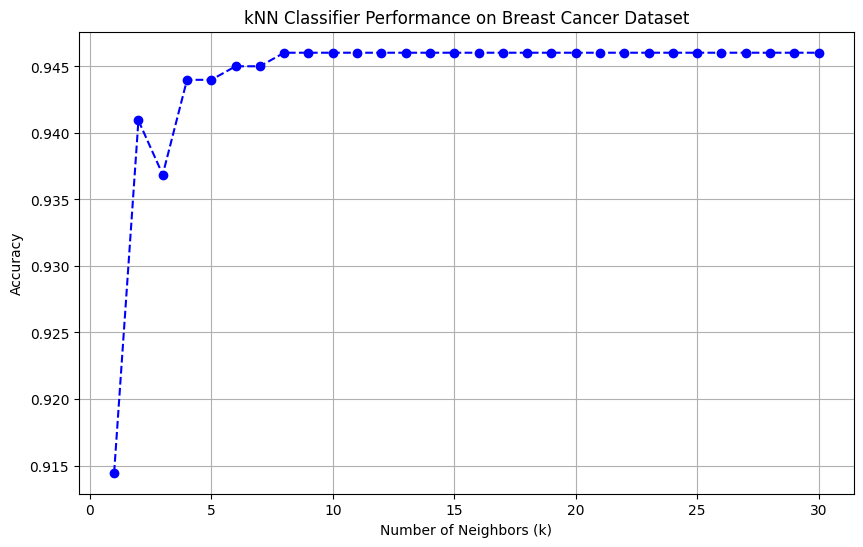

In [117]:
# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Classifier Performance on Breast Cancer Dataset')
plt.grid(True)
plt.show()

## Aufgabe

* Verwende nun die folgenden Datasets und versuche die bestmögliche Performance zu erreichen.
* Lade dazu das Dataset mit den bekannten Methoden (Laden mit Hilfe von `pd.read_csv`)
* Überlege, wie du bei schlechter Performance diese verbessern kannst. Zum Beipsiel: Normalisieren, Ausreißer entfernen etc.
* Müssen wir ggf. Features entfernen?
* Gehören ggf. Features mit einem Ordinal-Encoder oder mit einem Onehot-Encoder encodiert?
* Verwende für jedes Dataset eigene Code-Zellen und dokumentiere für die verschiedenen Durchläufe die Ergebnisse (zBsp. Accuracy, Confusion Matrix oder den MSE)

**Datasets:**
* Breast Cancer `breast_cancer.csv` (verwendet von https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
* Diabetes `diabetes.csv` (verwendet von https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* Stroke Prediction `stroke.csv` (verwendet von https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

*Hinweis:* Überlege dir stets, welchen Problemtyp du verwendest und verwende dementsprechend das richtige Model! 

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0       0.30010          0.14710     0.2419        

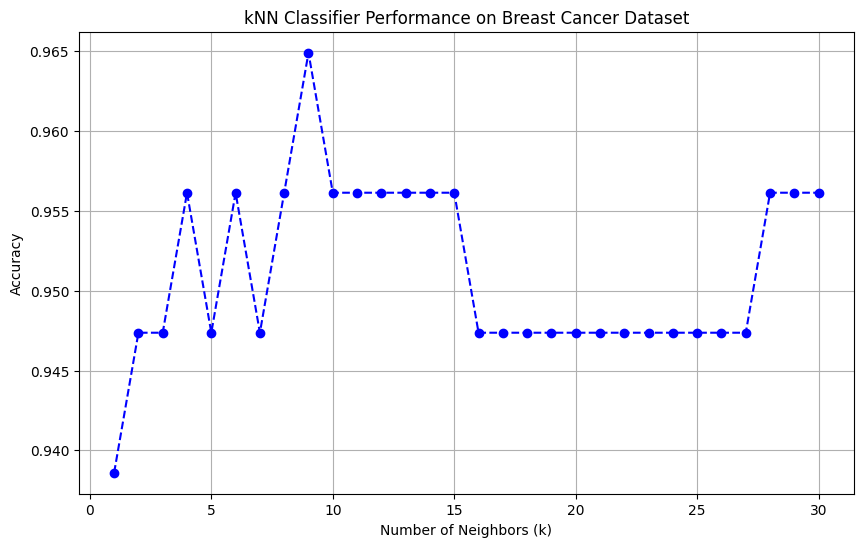

In [119]:
# Load dataset (Vehicle Silhouettes dataset)
ds = pd.read_csv("../../_data/breast_cancer.csv") # ggf. etwas anders als unser bisheriges Dataset
print(ds)
ds = ds.dropna()
y = ds.Diagnosis
X = ds.drop('Diagnosis', axis=1)
X = X.select_dtypes(include=[np.number])
le = LabelEncoder()
y = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
k_values = range(1, 31)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Classifier Performance on Breast Cancer Dataset')
plt.grid(True)
plt.show()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

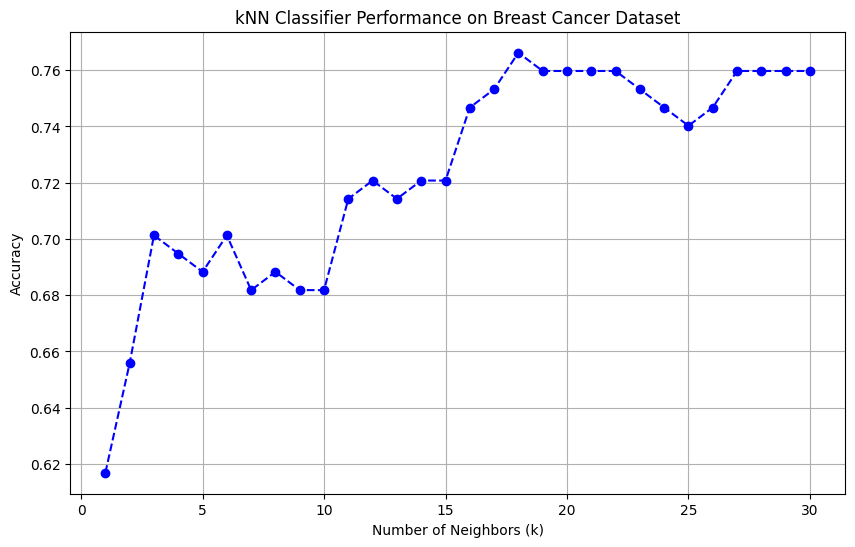

In [121]:
# Load dataset (Vehicle Silhouettes dataset)
ds = pd.read_csv("../../_data/diabetes.csv") # ggf. etwas anders als unser bisheriges Dataset
print(ds)
ds = ds.dropna()
y = ds.Outcome
X = ds.drop('Outcome', axis=1)
X = X.select_dtypes(include=[np.number])
le = LabelEncoder()
y = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
k_values = range(1, 31)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Classifier Performance on Breast Cancer Dataset')
plt.grid(True)
plt.show()